<a href="https://colab.research.google.com/github/mydevco/python-desktop-reference/blob/main/Tensorflow_Without_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow is a machine learning and ML pipeline library. It is typically used with keras package within tensorflow or SKLearn. The following exampole uses standalone tensorflow functions to recognize handwritten digit.

Credit: https://ruslanmv.com/blog/Neural-Networks-in-Tensorflow?srsltid=AfmBOop0QxBi9aTXUm0e6ErKwmYivv_VvJIokpgfRZlsGrWV8rkx0iua

In [ ]:
import tensorflow as tf

print(f'TensorFlow Version in current environment is ${tf.__version__}')

TensorFlow Version in current environment is $2.19.0


In [ ]:
!pip install keras
!pip install np_utils
%matplotlib inline

In [ ]:
#Load and split MNIST dataset in tensorflow and split ity into train and test set.

import numpy as np
import np_utils                         # NumPy related tools
import matplotlib.pyplot as plt # MATLAB like plotting routines
import nn_utils
import tensorflow as tf
import random

from keras.datasets import mnist     # MNIST dataset is included in Keras

# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
#Load and preprocess the MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


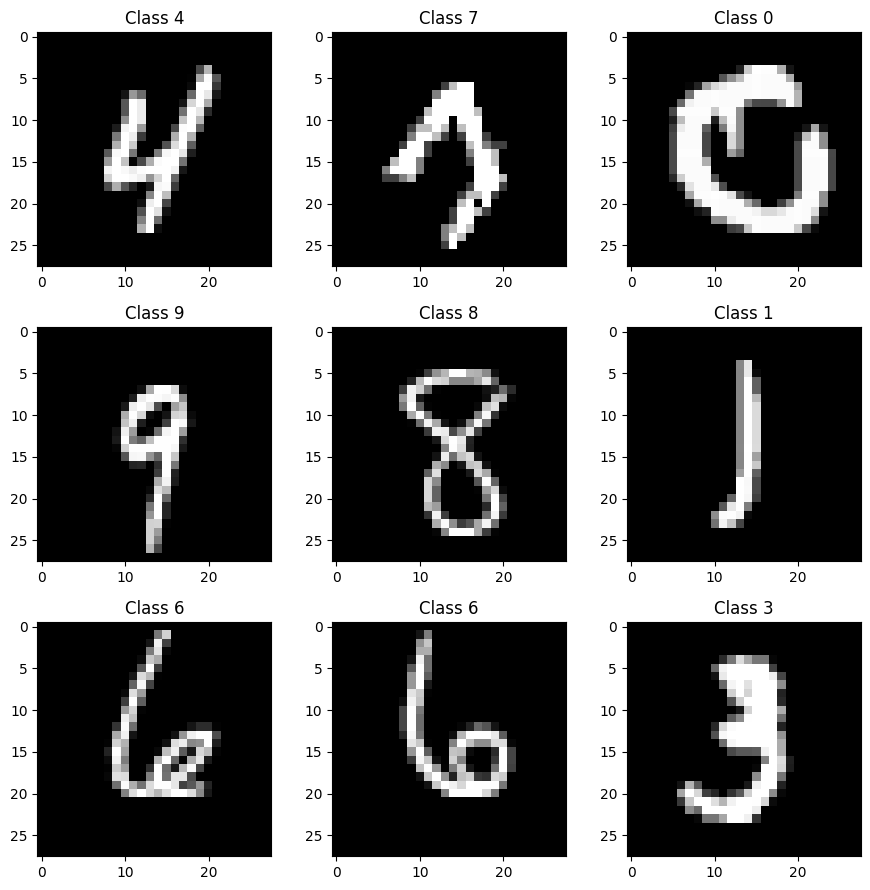

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train_flatten))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

In [ ]:
#Print out the array representing the last digit.
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0   42  118  219  166  118  118    6    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0  103  242  254  254  254  254  254   66    0   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0   18  232  254  254  254  254  254  238   70   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0  104  244  254  224  254  254  254  141   0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0  207  254  210  254  254  254   34   0  0  0  0  0  0  0 

In [102]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
    x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)

def plot_random_examples(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    if p is None:
        p = y
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color=col)
    return plt

def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

##Format the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## Prepare Train and Test Split

In [ ]:
from keras.utils import to_categorical

nb_classes = 10  # number of unique digits
#Converts a class vector (integers) to binary class matrix.
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

We have to create the Neural Network class, understand the init function and setting up initial parameter values.
## Build the neural network with hidden layer

In [ ]:
#net = NeuralNewtwork(10,100,11)
#10 features for each example
#11 classes for each example
#100 unit in the hidden layer

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]

        self.W = {}
        self.b = {}

        self.dW = {}
        self.db = {}

        self.setup()

    def setup(self):

        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

class NeuralNetwork(NeuralNetwork) :

    def forward_pass(self, X):

        A = tf.convert_to_tensor(X, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

    # softmax cross entropy loss function
    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)

    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])

    def predict(self, X):

        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)

    def print_detail(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

    def train_on_batch(self, X, Y, lr):

        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)

        # Gradient descent with automatic differentiation.
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy()

    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):

        history = {
            'val_loss':[],
            'train_loss':[],
            'val_acc':[]
        }

        #split into random parts and train with each part

        for e in range(0, epochs):
            epoch_train_loss = 0.
            print('Epoch{}'.format(e), end='.')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]

                batch_loss = self.train_on_batch(x_batch, y_batch,lr)
                epoch_train_loss += batch_loss

                if i%int(steps_per_epoch/10) == 0:
                    print(end='.')

            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            val_acc =   np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
            history['val_acc'].append(val_acc)
            print('Val acc:',val_acc)
        return history

## Use Neural network and trest its accuracy

In [ ]:
neural_network = NeuralNetwork([784,128,128,10])
neural_network.print_detail()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [ ]:
batch_size = 120
epochs = 5
steps_per_epoch = int(X_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [105]:
history = neural_network.train(
    X_train, Y_train, # Use one-hot encoded Y_train
    X_test, Y_test,   # Use one-hot encoded Y_test
    epochs, steps_per_epoch,
    batch_size, lr)

Epoch0...........Val acc: 0.8028
Epoch1...........Val acc: 0.839
Epoch2...........Val acc: 0.854
Epoch3...........Val acc: 0.8612
Epoch4...........Val acc: 0.8662


In [107]:
test_predictions = neural_network.predict(X_test)
true_labels = np.argmax(Y_test, axis=1)

final_test_accuracy = np.mean(true_labels == test_predictions.numpy())
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Final Test Accuracy: 0.8662


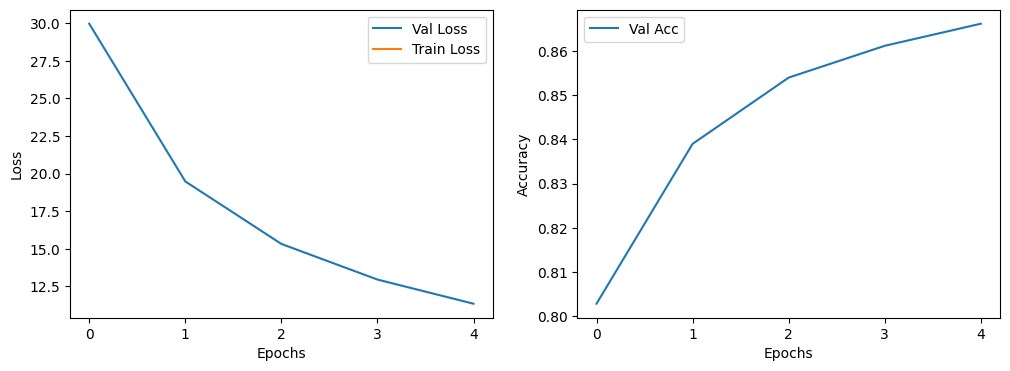

In [108]:
plot_results(history)
plt.show()